### chap.07 Multicalss

In [2]:
import tensorflow as tf
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

x_train = x_train / 255
x_val = x_val / 255

x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=40, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7361 - accuracy: 0.5061 - val_loss: 0.9729 - val_accuracy: 0.7276
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.9090 - accuracy: 0.7297 - val_loss: 0.7615 - val_accuracy: 0.7573
Epoch 3/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.7420 - accuracy: 0.7574 - val_loss: 0.6725 - val_accuracy: 0.7721
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6694 - accuracy: 0.7712 - val_loss: 0.6205 - val_accuracy: 0.7875
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6220 - accuracy: 0.7890 - val_loss: 0.5832 - val_accuracy: 0.8016
Epoch 6/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5898 - accuracy: 0.7976 - val_loss: 0.5552 - val_accuracy: 0.8088
Epoch 7/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.8073 - val_loss: 0.5342 - val_accuracy:

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


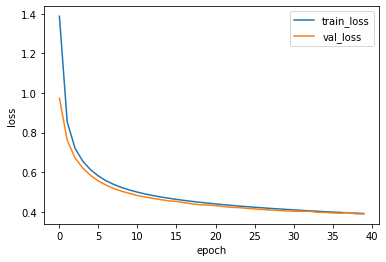

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

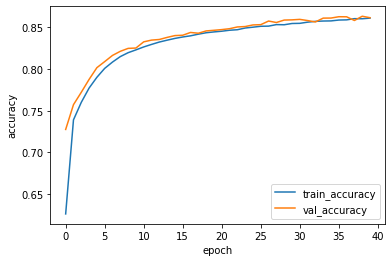

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [16]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.8614166378974915


### chap.08 convolutionNetwork

In [45]:
(x_train_all_c, y_train_all_c), (x_test_c, y_test_c) = tf.keras.datasets.fashion_mnist.load_data()

x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(x_train_all_c, y_train_all_c, stratify=y_train_all_c, test_size=0.2, random_state=42)
y_train_encoded_c = tf.keras.utils.to_categorical(y_train_c)
y_val_encoded_c = tf.keras.utils.to_categorical(y_val_c)

x_train_c = x_train_c.reshape(-1, 28, 28, 1)
x_val_c = x_val_c.reshape(-1, 28, 28, 1)

x_train_c = x_train_c / 255
x_val_c = x_val_c / 255

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [47]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10,(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))
conv1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               196100    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [48]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = conv1.fit(x_train_c, y_train_encoded_c, epochs=20, validation_data=(x_val_c, y_val_encoded_c))

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.6342 - accuracy: 0.7848 - val_loss: 0.3367 - val_accuracy: 0.8824
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3245 - accuracy: 0.8836 - val_loss: 0.2817 - val_accuracy: 0.9001
Epoch 3/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2667 - accuracy: 0.9029 - val_loss: 0.2699 - val_accuracy: 0.9025
Epoch 4/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2311 - accuracy: 0.9150 - val_loss: 0.2515 - val_accuracy: 0.9103
Epoch 5/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1996 - accuracy: 0.9252 - val_loss: 0.2549 - val_accuracy: 0.9096
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1770 - accuracy: 0.9358 - val_loss: 0.2570 - val_accuracy: 0.9083
Epoch 7/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1618 - accuracy: 0.9396 - val_loss: 0.2518 -

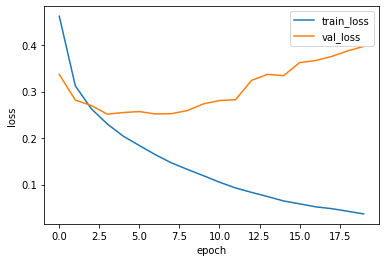

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

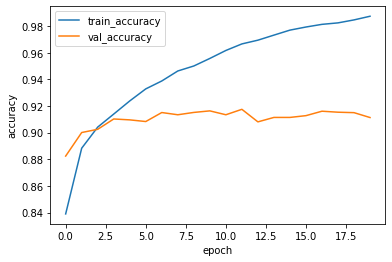

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [51]:
loss, accuracy =conv1.evaluate(x_val_c, y_val_encoded_c, verbose=0)
print(accuracy)

0.9113333225250244


In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))
conv2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1960)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               196100    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [54]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = conv2.fit(x_train_c, y_train_encoded_c, epochs=20, validation_data=(x_val_c, y_val_encoded_c))

Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6770 - accuracy: 0.7589 - val_loss: 0.3479 - val_accuracy: 0.8749
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3768 - accuracy: 0.8623 - val_loss: 0.3008 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3330 - accuracy: 0.8782 - val_loss: 0.2760 - val_accuracy: 0.9003
Epoch 4/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3022 - accuracy: 0.8894 - val_loss: 0.2671 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2777 - accuracy: 0.8979 - val_loss: 0.2595 - val_accuracy: 0.9060
Epoch 6/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2686 - accuracy: 0.8988 - val_loss: 0.2538 - val_accuracy: 0.9101
Epoch 7/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2536 - accuracy: 0.9051 - val_loss: 0.2451 -

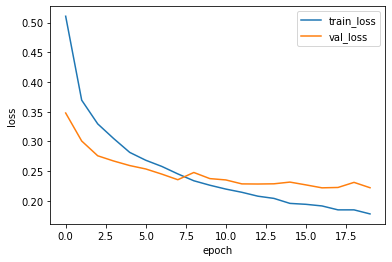

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

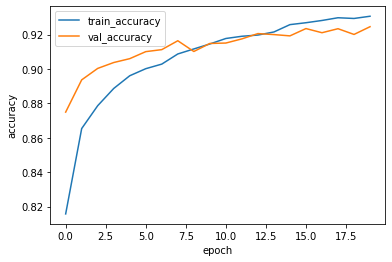

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [57]:
loss, accuracy = conv2.evaluate(x_val_c, y_val_encoded_c, verbose=0)
print(accuracy)

0.9245833158493042
